# <center> 支持向量机

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MINST=pd.read_csv("https://phys.xmu.edu.cn/sites/default/files/2020-03/mnist_0.csv")

In [3]:
MINST.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y=MINST["label"].values.reshape(-1,1)
X=MINST[MINST.columns[1:785]].values

In [5]:
Y.shape

(10000, 1)

In [6]:
X.shape

(10000, 784)

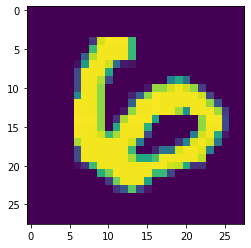

In [7]:
a=X[9000]
image=a.reshape(28,28)
plt.imshow(image)

In [8]:
Y[9000]

array([6])

# 数据归一化

In [11]:
from sklearn import preprocessing

X_scaled=preprocessing.scale(X)

y=Y

# 数据库分割

In [13]:
from sklearn.model_selection import train_test_split

split_test_size=0.3

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=split_test_size,random_state=42)

print("训练集：",len(X_train),"l：",len(y_train[y_train[:]==1]))
print("测试集：",len(X_test),"l：",len(y_test[y_test[:]==1]))

训练集： 7000 l： 790
测试集： 3000 l： 337


# SVM训练

## 我们先取一个较大的C值 C=100

In [14]:
from sklearn import svm
clf=svm.SVC(C=100,kernel='rbf',gamma='auto')
clf.fit(X_train,y_train.ravel())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 接下来我们对这个算法进行评估

In [16]:
from sklearn import metrics

lr_cv_predict_train=clf.predict(X_train)

print("Training Accuracy:{0:.4f}".format(metrics.accuracy_score(y_train,lr_cv_predict_train)))

print("=======================================================")

lr_cv_predict_test=clf.predict(X_test)

print("Testing Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,lr_cv_predict_test)))

Training Accuracy:1.0000
Testing Accuracy:0.9443


## 我们再取默认的C值 C=1

In [22]:
from sklearn import svm
clf1=svm.SVC(kernel='rbf',gamma='auto')
clf1.fit(X_train,y_train.ravel())


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 取一个较小的C值 C=0.01

In [23]:
clf2=svm.SVC(C=0.01,kernel='rbf',gamma='auto')
clf2.fit(X_train,y_train.ravel())

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## 对C=1 进行评估

In [24]:
lr_cv_predict_train_1=clf1.predict(X_train)

print("Training Accuracy:{0:.4f}".format(metrics.accuracy_score(y_train,lr_cv_predict_train_1)))

print("=======================================================")

lr_cv_predict_test_1=clf1.predict(X_test)

print("Testing Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,lr_cv_predict_test_1)))

Training Accuracy:0.9780
Testing Accuracy:0.9370


## 对C=0.01进行评估

In [26]:
lr_cv_predict_train_2=clf2.predict(X_train)

print("Training Accuracy:{0:.4f}".format(metrics.accuracy_score(y_train,lr_cv_predict_train_2)))

print("=======================================================")

lr_cv_predict_test_2=clf2.predict(X_test)

print("Testing Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,lr_cv_predict_test_2)))

Training Accuracy:0.5683
Testing Accuracy:0.5733


# 结论

## 我们发现C=1的默认值给出了相当好的性能，在训练集上达到了97%的精度，在测试集也达到了93.7%的精度

## 而C=100可以得到准确率100%的训练集精度，且在测试集也有94.43%的精度，但这个模型很可能过拟合

## 而对于C=0.01，训练集精度只有56.83%，测试集中也只有57.33%，明显欠拟合